In [2]:
import pandas as pd 

from google.colab import drive
drive.mount('/gdrive')
#Change current working directory to gdrive
%cd /gdrive

Mounted at /gdrive
/gdrive


In [3]:
#Read files
datafile = r'/gdrive/My Drive/Data Projects/Marketing Analytics/Lesson 2/conversion_rates.csv'
data = pd.read_csv(datafile) #creates a dataframe

,converted,group
0,0,B
1,0,B
2,0,A
3,0,B
4,0,A
5,0,B
6,0,A
7,0,B
8,0,B
9,0,A


**Exploratory Data Analysis**

In [16]:
data.head()

,converted,group
0,0,B
1,0,B
2,0,A
3,0,B
4,0,A


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   converted  2000 non-null   int64 
 1   group      2000 non-null   object
dtypes: int64(1), object(1)
memory usage: 31.4+ KB


**Determine Conversions, Views, and Conversion Rate**

In [5]:
#group the data and count the number of conversions, storing the result in a dataframe
converted = data.groupby('group').sum()
converted

,converted
group,
A,90
B,21


count of converted displays

In [6]:
#group the data and count the number of times each ad was displayed
#store in new data frame called viewed, and rename column name to viewed
viewed = data.groupby('group').count().rename({'converted':'viewed'}, axis='columns')
viewed

,viewed
group,
A,1030
B,970


count of number of views

In [7]:
#combine the converted and viewed datasets in a new df called stats
stats = converted.merge(viewed, on = 'group')
stats

,converted,viewed
group,,
A,90,1030
B,21,970


In [8]:
#calculate the conversion ratio to get the ratio of converted ads to number of times the ads were displayed
stats['conversion_ratio'] = stats['converted']/stats['viewed']
stats

,converted,viewed,conversion_ratio
group,,,
A,90,1030,0.087379
B,21,970,0.021649


In [9]:
#create a df where group A's conversion rate is accessed as df['A']
df = stats.stack()
df

group                  
A      converted             90.000000
       viewed              1030.000000
       conversion_ratio       0.087379
B      converted             21.000000
       viewed               970.000000
       conversion_ratio       0.021649
dtype: float64

In [10]:
df['A']['conversion_ratio']

0.08737864077669903

In [11]:
stats.unstack().unstack()

group,A,B
converted,90.000000,21.000000
viewed,1030.000000,970.000000
conversion_ratio,0.087379,0.021649


**Pivot Tables**

In [12]:
data.pivot(columns = 'group', values='converted').head()

group,A,B
0,NaN,0.0
1,NaN,0.0
2,0.0,NaN
3,NaN,0.0
4,0.0,NaN


In [13]:
data.pivot_table(index='group', columns='converted', aggfunc=len)

converted,0,1
group,,
A,940,90
B,949,21


**Data Visualization**

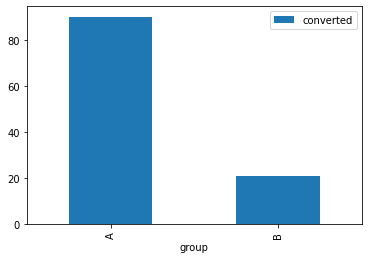

In [20]:
data.groupby('group').sum().plot(kind='bar', y='converted')